In [1]:

import sys
import os
sys.path.append('../')
from Codes.model import *
from Codes.utils import *

plt.style.use('default')

import pickle
RESULT_DIR = "../../ExptsPaper"
# os.mkdir(RESULT_DIR)
from timeit import default_timer
from sklearn.datasets import make_blobs

from tqdm.notebook import tqdm


In [2]:
N = 1000
D = 2
K = 3
box = 20
seed = 37
outliers = 64

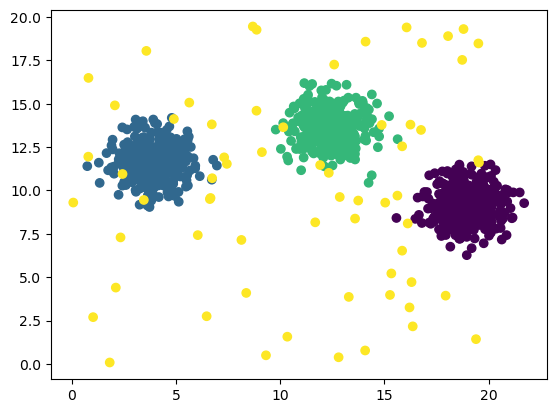

5.082531176657371

In [3]:


def BlobsWithOutliers(N,D,K,box,seed, outliers):

    generator = np.random.RandomState(seed)
    center_box = [0,box]

    centers = generator.uniform(center_box[0], center_box[1], size=(K, D))

    X, y = make_blobs(n_samples=N, centers=centers, n_features=D, cluster_std = 1,
                    random_state=seed)


    X1 = generator.uniform(low = [0,0], high = [box, box ], size = (outliers,2) )
    # X1 = generator.uniform(low = [2,0], high = [14, 6 ], size = (64,2) )

    X = np.append(X, X1,axis = 0)

    y = np.append(y, len(X1)*[K], axis = 0)


    cols = [ 'X' + str(i+1) for i in range(D) ]

    df_data = pd.DataFrame(np.c_[X,y], columns = ['X1','X2','y'])

    df_data = pd.DataFrame(X, columns = cols)
  

    return df_data, X,y, centers

df_data, X,y, centers = BlobsWithOutliers(N,D,K,box,seed, outliers)

_,ax = plt.subplots(1)
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()     
cik = np.zeros((N,K))
for i in range(N):

    cik[i,y[i]] = 1

dist = manhattan_distances(X[:1000,:],centers)
distM = dist*cik
np.max(distM)

## kc-Opt for Dataset2

In [6]:

outliers_list = [4,8,16,32,64]
optgap_list=[]

time_list = []
metrics_list = []

obj_list = []
constrsCnt_list = []

maxdist_list = []

for i, outliers in enumerate(tqdm(outliers_list)):



    print('\nStarting outliers = %i' %(outliers))

    df_data, X,y,_ = BlobsWithOutliers(N,D,K,box,seed, outliers)

    clus = UnsupervisedClustering(K =K , max_iter= 30, random_state=0)
    clus.set_model(MinMax(initConstrCnt=8, optimalGap= 0.05, tol = 0.05, time = 30))

    start = default_timer()
    clus.fit(df_data )

    end = default_timer()
    metrics_list.append(clus.evaluate(y))
    # print(metrics_list[-1])
    time_list.append(end-start)

    constrsCnt_list.append(len(clus.constr_gen_pts))
    optgap_list.append(clus.model_optGap)
    obj_list.append(clus)

    maxdist_list.append(clus.model_optVal)


    print('Finished outliers = %i' %(outliers))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn3_'+str(K)+str(D)+'_MM.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(constrsCnt_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(maxdist_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(obj_list, outp, pickle.HIGHEST_PROTOCOL)



  0%|          | 0/5 [00:00<?, ?it/s]


Starting outliers = 4
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 1800
Set parameter MIPGap to value 0.05
E:  5.391908655975369
E:  5.945668946019784
Optimal solution reached with Cost:  5.945668946019784


# of constraints added:  38
Finished outliers = 4
****************************************************************************************************

Starting outliers = 8
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 1800
Set parameter MIPGap to value 0.05
E:  6.848259618244505
E:  7.229894985888112
Optimal solution reached with Cost:  7.229894985888112


# of constraints added:  38
Finished outliers = 8
****************************************************************************************************

Starting outliers = 16
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 1800
Set parameter MIPGap to value 0.05
E:  8.688306265635482
E:  9.205236607830562
E:  9.205236607830564
Optimal solution reached with Cost:  9.205

## Outlier-aware kc-OptOut for Dataset2

In [4]:

outliers_list = [4,8,16,32,64]
initconstr_list = [15,20, 25, 35 ,50]
optgap_list=[]

time_list = []
metrics_list = []

obj_list = []
constrsCnt_list = []

maxdist_list = []


for i, outliers in enumerate(tqdm(outliers_list)):


    print('\nStarting outliers = %i' %(outliers))

    df_data, X,y,_ = BlobsWithOutliers(N,D,K,box,seed, outliers)

    clus = UnsupervisedClustering(K =K , max_iter= 30, random_state=0)
    clus.set_model(MinMax(initConstrCnt=initconstr_list[i], optimalGap= 0.05, tol = 0.05, time = 60, outliersCnt=outliers, initConstrIntRatio=12))

    start = default_timer()
    clus.fit(df_data )

    end = default_timer()
    metrics_list.append(clus.evaluate(y))
    # print(metrics_list[-1])
    time_list.append(end-start)

    constrsCnt_list.append(len(clus.constr_gen_pts))
    optgap_list.append(clus.model_optGap)
    obj_list.append(clus)

    maxdist_list.append(clus.model_optVal)


    print('Finished outliers = %i' %(outliers))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn3_'+str(K)+str(D)+'_MMOut.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(constrsCnt_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(maxdist_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(obj_list, outp, pickle.HIGHEST_PROTOCOL)



  0%|          | 0/5 [00:00<?, ?it/s]


Starting outliers = 4
MinMax model 4
# of outliers:  4
Set parameter Username
Academic license - for non-commercial use only - expires 2022-11-07
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  4.206430294274652
Optimal solution reached with Cost:  4.206430294274652


# of constraints added:  48
Finished outliers = 4
****************************************************************************************************

Starting outliers = 8
MinMax model 8
# of outliers:  8
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  4.0646781215468035
Optimal solution reached with Cost:  4.0646781215468035


# of constraints added:  63
Finished outliers = 8
****************************************************************************************************

Starting outliers = 16
MinMax model 16
# of outliers:  16
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  3.9102529199948823
Optimal solution reached with Cost

## k,z-center (Charikar) on Dataset2

In [ ]:

outliers_list = [4,8,16,32,64]
initconstr_list = [20,30, 30, 50 ,60]
optgap_list=[]

time_list = []
metrics_list = []



maxdist_list = []

obj_list = []

for i, outliers in enumerate(tqdm(outliers_list)):

    print('\nStarting outliers = %i' %(outliers))

    df_data, X,y,_ = BlobsWithOutliers(N,D,K,box,seed, outliers)

    clus = UnsupervisedClustering(K =K , max_iter= 30, random_state=0)
    clus.set_model(KZcenters_charikar(n_outliers=outliers))

    start = default_timer()
    clus.fit(df_data )

    end = default_timer()
    metrics_list.append(clus.evaluate(y))
    # print(metrics_list[-1])
    time_list.append(end-start)


    obj_list.append(clus)

    maxdist_list.append(clus.epsVal)


    print('Finished outliers = %i' %(outliers))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn3_'+str(K)+str(D)+'_KZCenter_Charikar.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(maxdist_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(obj_list, outp, pickle.HIGHEST_PROTOCOL)


